## Logistic Regression 30 Day Mortality

In [43]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegressionCV

# %matplotlib inline
plt.rcParams.update({'figure.titlesize': 'larger', 'legend.fontsize': 15.0})

In [7]:
data_train_30d = pd.read_csv('data_pp_train_30d.csv')
data_test_30d = pd.read_csv('data_pp_test_30d.csv')

In [36]:
X_train = data_train_30d.copy()
y_train = data_train_30d.copy()
X_test = data_test_30d.copy()
y_test  = data_test_30d.copy()

In [37]:
X_train = X_train.drop(['one_year', 'thirty_days'], axis = 1)
y_train = y_train[['thirty_days']]

X_test = X_test.drop(['one_year', 'thirty_days'], axis = 1)
y_test = y_test[['thirty_days']]


y_train = y_train['thirty_days']
y_test = y_test['thirty_days']


print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (38857, 109)
38857 train samples
19139 test samples


In [39]:
clf = LogisticRegressionCV(
    Cs=40,
    fit_intercept=True,
    cv=40,
    dual=False,
    penalty='l2',
    scoring=None,
    solver='lbfgs',
    tol=0.0001,
    max_iter=100,
    class_weight=None,
    n_jobs=-1,
    verbose=0,
    refit=True,
    intercept_scaling=1.0,
    multi_class='ovr',
    random_state=None,
).fit(X_train, y_train)

In [40]:
clf.score(X_test, y_test) 

0.8988452897225561

In [63]:
y_p = clf.predict_proba(X_test)[:,1]

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_p)

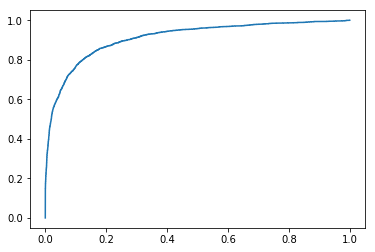

In [65]:
plt.plot(fpr,tpr)